In [1]:
import os
import sys

home=os.path.expanduser("~")
os.environ["SPARK_HOME"]=os.path.join(home, 'spark-2.0.0-bin-hadoop2.7')
os.environ["PYLIB"]=os.path.join(os.environ["SPARK_HOME"],'python','lib')
sys.path.insert(0,os.path.join(os.environ["PYLIB"],'py4j-0.10.1-src.zip'))
sys.path.insert(0,os.path.join(os.environ["PYLIB"],'pyspark.zip'))

In [2]:
import pyspark
myConf=pyspark.SparkConf()
spark = pyspark.sql.SparkSession.builder.master("local").appName("myApp").config(conf=myConf).getOrCreate()

# 문제 1

# 문제 2

In [122]:
import pandas as pd
colname=['AGE', 'SEX', 'BMI', 'BP','S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'Y']

df=pd.read_csv(os.path.join('data','diabetes.tab.txt'), delimiter='\t')
print df.describe()
df['male'] = (df['SEX']==1).astype(int)
df['female'] = (df['SEX']==2).astype(int)
print '\n'
print df.head()

ddf= spark.createDataFrame(df)

from pyspark.ml.feature import VectorAssembler
vectorAssembler = VectorAssembler(inputCols = ['AGE','BMI','BP','S1','S2','S3','S4','S5','S6', 'male', 'female'],outputCol='features')
dfFeatures = vectorAssembler.transform(ddf)
print '\n'

print dfFeatures.show(10)

from pyspark.ml.regression import LinearRegression
lr = LinearRegression(featuresCol='features', labelCol='Y', maxIter=10, regParam=0.3, elasticNetParam=0.8)
#lr_model = lr.fit(dfFeatures)

              AGE         SEX         BMI          BP          S1          S2  \
count  442.000000  442.000000  442.000000  442.000000  442.000000  442.000000   
mean    48.518100    1.468326   26.375792   94.647014  189.140271  115.439140   
std     13.109028    0.499561    4.418122   13.831283   34.608052   30.413081   
min     19.000000    1.000000   18.000000   62.000000   97.000000   41.600000   
25%     38.250000    1.000000   23.200000   84.000000  164.250000   96.050000   
50%     50.000000    1.000000   25.700000   93.000000  186.000000  113.000000   
75%     59.000000    2.000000   29.275000  105.000000  209.750000  134.500000   
max     79.000000    2.000000   42.200000  133.000000  301.000000  242.400000   

               S3          S4          S5          S6           Y  
count  442.000000  442.000000  442.000000  442.000000  442.000000  
mean    49.788462    4.070249    4.641411   91.260181  152.133484  
std     12.934202    1.290450    0.522391   11.496335   77.093005 

# 문제 3

Optimization terminated successfully.
         Current function value: 0.547344
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                     _2   No. Observations:                   28
Model:                          Logit   Df Residuals:                       26
Method:                           MLE   Df Model:                            1
Date:                Wed, 18 Dec 2019   Pseudo R-squ.:                  0.1284
Time:                        16:10:28   Log-Likelihood:                -15.326
converged:                       True   LL-Null:                       -17.582
Covariance Type:            nonrobust   LLR p-value:                   0.03363
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.6343      1.349     -1.212      0.226      -4.277       1.009
_1             5.0917      2.

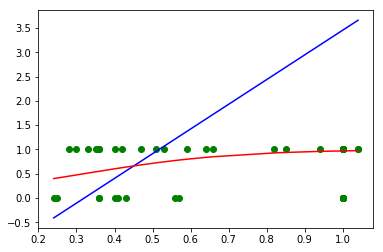

In [115]:
import pandas as pd

rdd=spark.sparkContext.textFile(os.path.join('data','ds9_xy.txt'))
myRdd=rdd.map(lambda line:[float(x) for x in line.split()])

pandas = myRdd.toDF().toPandas()

from patsy import dmatrices
y, X = dmatrices('_2 ~ _1', pandas, return_type = 'dataframe')

import statsmodels.discrete.discrete_model as sm

logit = sm.Logit(y,X)
result = logit.fit()
print result.summary()

w0, w1 = result.params
import numpy as np
import matplotlib.pyplot as plt

plt.plot(X, y, 'go')
plt.plot(X, w0 + w1* X, 'b-')
plt.plot(X, 1/(1+np.exp(-(w0+w1*X))),'r-')
plt.show()
